In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("bangalore_house _data.csv")

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [9]:
#society has lot of null values so drop
df.drop('society',axis=1,inplace=True)

In [10]:
#data formatting
df['size']=df['size'].str.replace('Bedroom','BHK')

In [11]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [12]:
df.duplicated().sum()

np.int64(568)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
for i in ['area_type','availability','size']:
    print(df[i].value_counts())

area_type
Super built-up  Area    8279
Built-up  Area          2397
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10140
18-May             290
18-Dec             283
18-Apr             269
18-Aug             187
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
size
2 BHK     5218
3 BHK     4643
4 BHK     1398
1 BHK      625
5 BHK      350
6 BHK      221
7 BHK       99
8 BHK       89
9 BHK       54
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: count, dtype: int64


In [15]:
df['size']=df['size'].str.replace('RK','BHK')

In [16]:
df['size'].value_counts()

size
2 BHK     5218
3 BHK     4643
4 BHK     1398
1 BHK      638
5 BHK      350
6 BHK      221
7 BHK       99
8 BHK       89
9 BHK       54
10 BHK      14
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: count, dtype: int64

In [17]:
for i in ['bath','balcony']:
    df[i].fillna(df[i].median(),inplace=True)

In [18]:
import warnings
warnings.filterwarnings("ignore")
df['size'].fillna(df['size'].mode()[0],inplace=True)

In [19]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [20]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox',standardize=False)
df['price_transformed'] = pt.fit_transform(df[['price']])

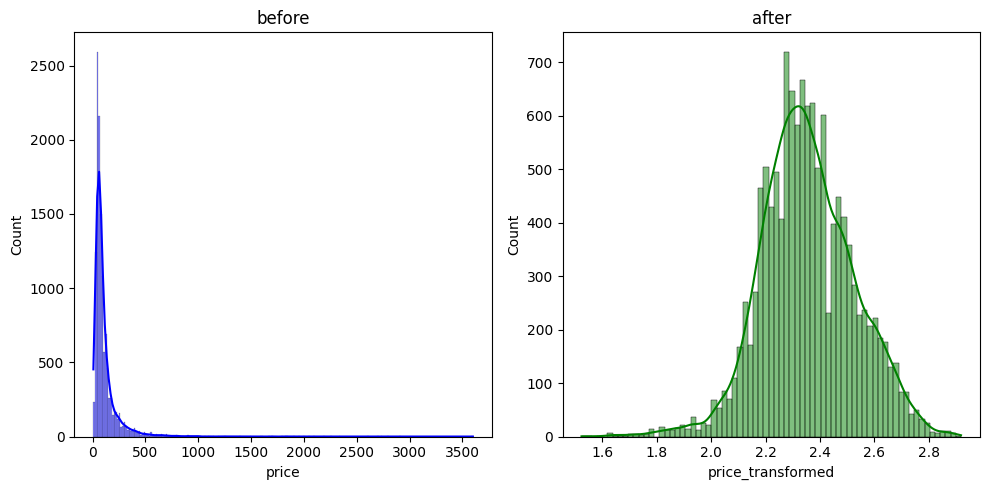

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,color='blue')
plt.title('before')

plt.subplot(1,2,2)
sns.histplot(df['price_transformed'],kde=True,color='green')
plt.title('after')

plt.tight_layout()
plt.show()

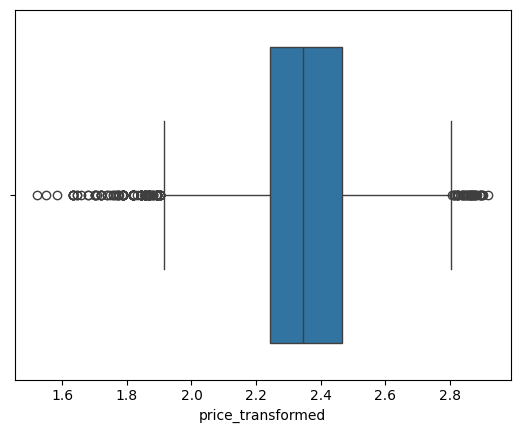

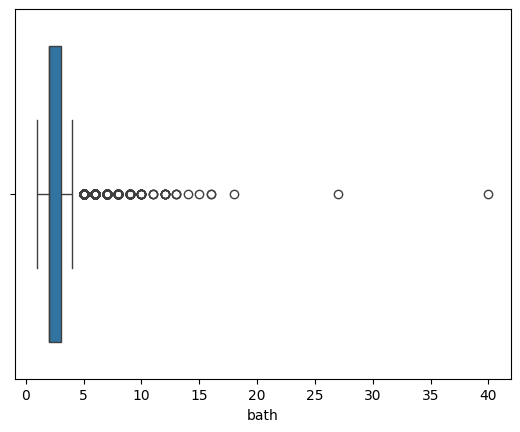

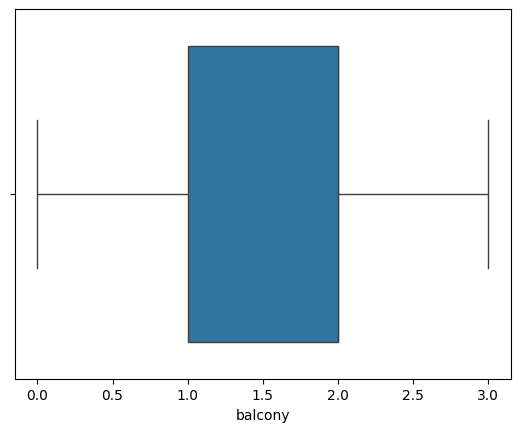

In [22]:
import warnings
warnings.filterwarnings("ignore")
for i in ['price_transformed','bath','balcony']: 
    sns.boxplot(data=df,x=i)
    plt.show()

In [23]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

lw,uw=wisker(df['bath'])
df['bath']=np.where(df['bath']<lw,lw,df['bath'])
df['bath']=np.where(df['bath']>uw,uw,df['bath'])

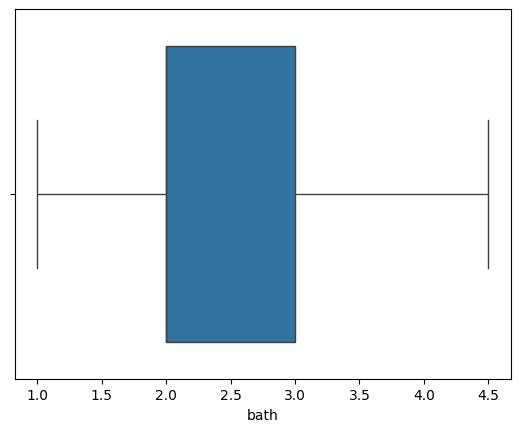

In [24]:
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(data=df,x=df['bath'])
plt.show()

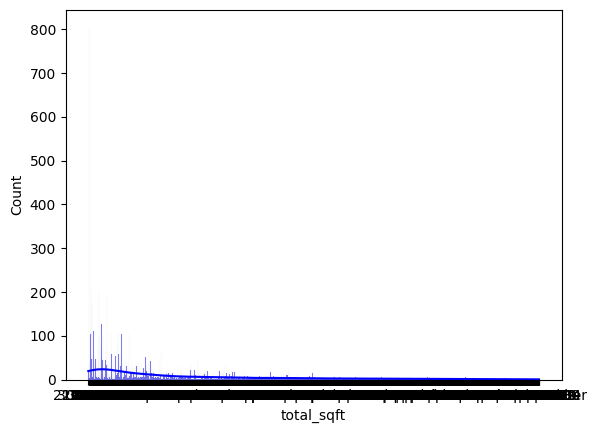

In [26]:
sns.histplot(df['total_sqft'],kde=True,color='blue') #skewed data
plt.show()

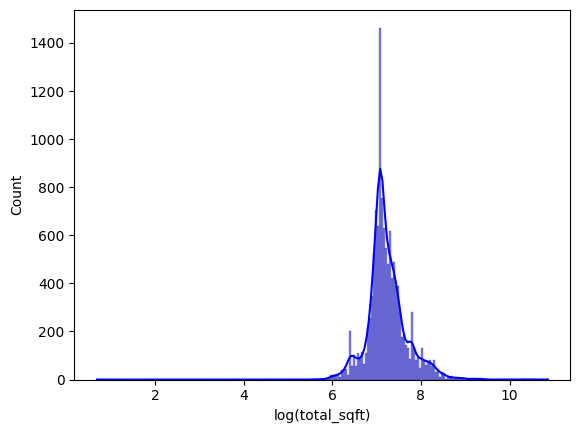

In [28]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['log_total_sqft'] = np.log1p(df['total_sqft'])
sns.histplot(df['log_total_sqft'], kde=True, color='blue')
plt.xlabel('log(total_sqft)')
plt.show()

In [29]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()
df['size']=le.fit_transform(df[[i]])

In [35]:
df

,availability,location,size,total_sqft,bath,balcony,price,price_transformed,log_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,1.0,1056.0,2.0,1.0,39.07,2.167557,6.963190,False,False,False,True
1,Ready To Move,Chikka Tirupathi,3.0,2600.0,4.5,3.0,120.00,2.463003,7.863651,False,False,True,False
2,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,2.301964,7.273093,True,False,False,False
3,Ready To Move,Lingadheeranahalli,1.0,1521.0,3.0,1.0,95.00,2.409843,7.327781,False,False,False,True
4,Ready To Move,Kothanur,1.0,1200.0,2.0,1.0,51.00,2.247508,7.090910,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,Ready To Move,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00,2.447711,7.447751,False,False,False,True
13315,Ready To Move,Whitefield,0.0,3453.0,4.0,0.0,231.00,2.592659,8.147288,True,False,False,False
13316,Ready To Move,Richards Town,2.0,3600.0,4.5,2.0,400.00,2.682422,8.188967,False,False,False,True
13317,Ready To Move,Raja Rajeshwari Nagar,1.0,1141.0,2.0,1.0,60.00,2.293056,7.040536,True,False,False,False


In [38]:
df['availability']=df['availability'].apply(lambda x: 'Scheduled' if x!='Ready To Move' else 'Ready')

In [39]:
df

,availability,location,size,total_sqft,bath,balcony,price,price_transformed,log_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Scheduled,Electronic City Phase II,1.0,1056.0,2.0,1.0,39.07,2.167557,6.963190,False,False,False,True
1,Ready,Chikka Tirupathi,3.0,2600.0,4.5,3.0,120.00,2.463003,7.863651,False,False,True,False
2,Ready,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,2.301964,7.273093,True,False,False,False
3,Ready,Lingadheeranahalli,1.0,1521.0,3.0,1.0,95.00,2.409843,7.327781,False,False,False,True
4,Ready,Kothanur,1.0,1200.0,2.0,1.0,51.00,2.247508,7.090910,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,Ready,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00,2.447711,7.447751,False,False,False,True
13315,Ready,Whitefield,0.0,3453.0,4.0,0.0,231.00,2.592659,8.147288,True,False,False,False
13316,Ready,Richards Town,2.0,3600.0,4.5,2.0,400.00,2.682422,8.188967,False,False,False,True
13317,Ready,Raja Rajeshwari Nagar,1.0,1141.0,2.0,1.0,60.00,2.293056,7.040536,True,False,False,False
